In [112]:
!pip install opencv-python numpy matplotlib

### Import necessary libraries

In [113]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Question 1

In [114]:
# Import Emma image
emma = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert emma is not None

(256,)


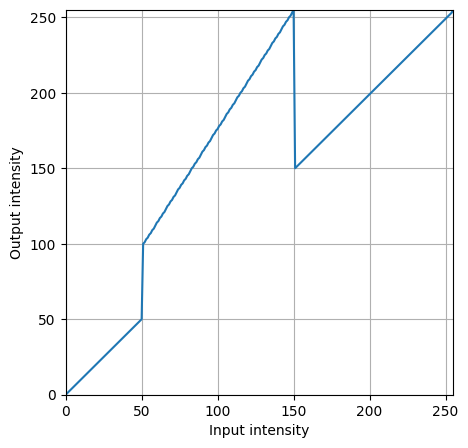

In [115]:
t1 = np.linspace(0,50, num=51).astype('uint8')
t2 = np.linspace(100,255, num=100).astype('uint8')
t3 = np.linspace(150,255, num=105).astype('uint8')

t = np.concatenate((t1,t2,t3), axis = 0).astype('uint8')
print(t.shape)

plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

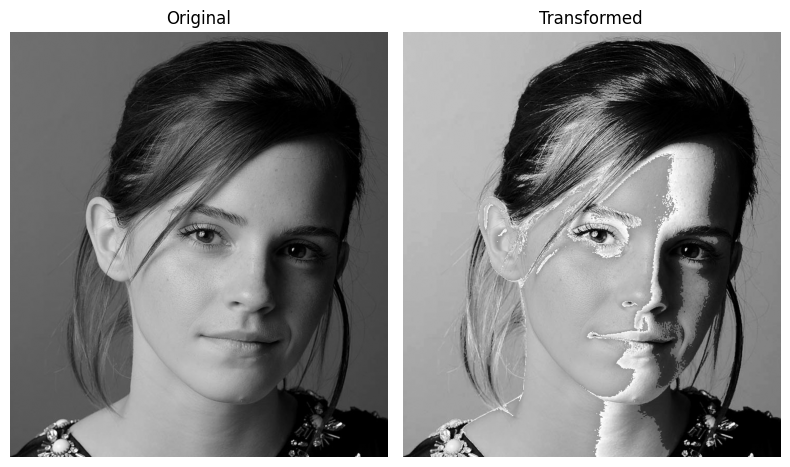

In [116]:
g = t[emma]

# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(emma, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis("off")
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed')
ax[1].axis("off")

plt.tight_layout()
plt.show()

### Question 2

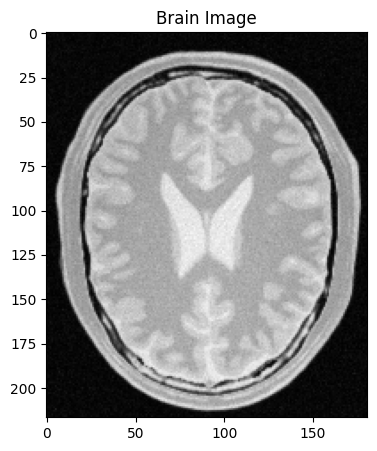

In [117]:
# Import brain image
brain = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

plt.figure(figsize=(5, 5))
plt.imshow(brain, cmap='grey',vmin=0, vmax=255)
plt.title('Brain Image')
plt.show()

(256,)


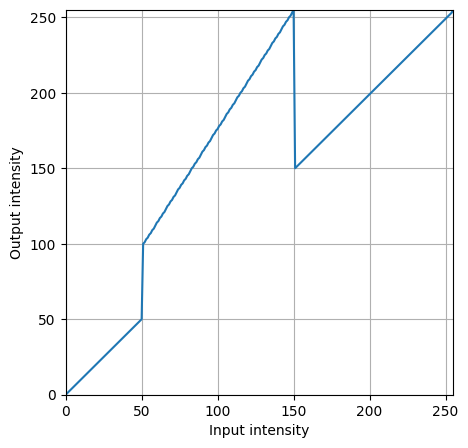

In [118]:
# Define piecewise transformation function
t1 = np.linspace(0, 50, num=51).astype('uint8')
t2 = np.linspace(100, 255, num=100).astype('uint8')
t3 = np.linspace(150, 255, num=105).astype('uint8')

# Concatenate all segments to create the transformation array
t = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

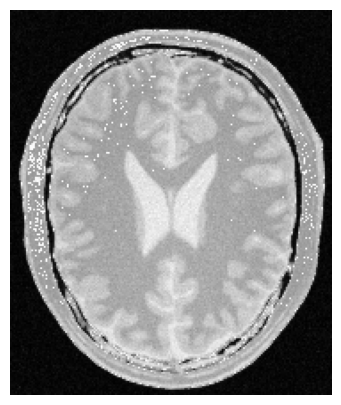

In [119]:
g = t[brain]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

##### The above method used for Q1 doesn't work

### White Matter

(256,)


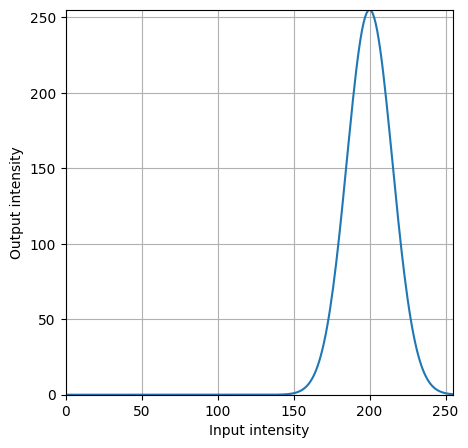

In [120]:
mu = 200
sigma = 15
x = np.linspace(0, 255, 256)
t =  255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t = np.clip(t, 0, 255)

print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

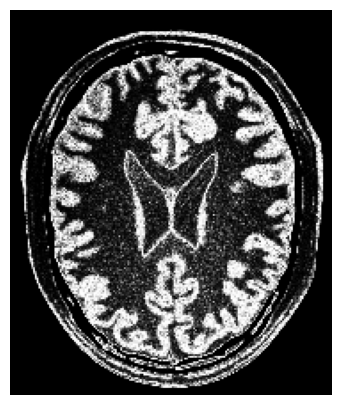

In [121]:
g = t[brain]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

### Grey Matter

(256,)


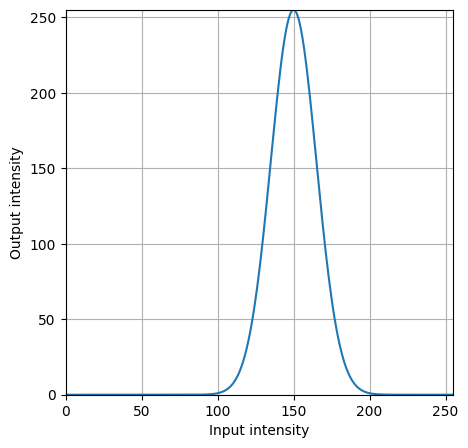

In [122]:
mu = 150
sigma = 15
x = np.linspace(0, 255, 256)
t =  255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t = np.clip(t, 0, 255)

print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

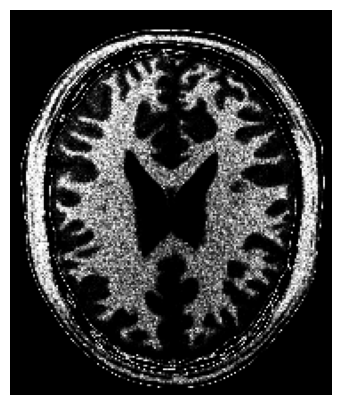

In [123]:
g = t[brain]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

### Question 3

In [124]:
# Import Emma image
img_bgr = cv.imread('a1images/highlights_and_shadows.jpg')
assert img_bgr is not None
img_lab = cv.cvtColor(img_bgr, cv.COLOR_BGR2LAB)
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

In [125]:
# Split the image in to L*a*b* color space
L,a,b = cv.split(img_lab)

# Define and apply gamma transformation
gamma = 0.6
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)]).astype('uint8')
L_modified = cv.LUT(L, t)

# Merge the channels
merged = cv.merge([L_modified, a, b])
img_modified = cv.cvtColor(merged, cv.COLOR_LAB2RGB)

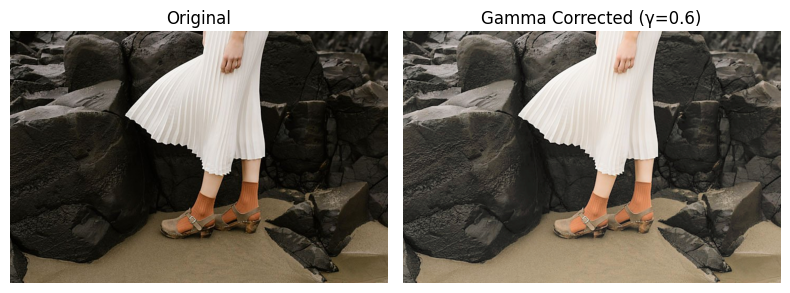

In [126]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

# Plot the first image
axs[0].imshow(img_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(img_modified)
axs[1].set_title(f'Gamma Corrected (γ={gamma})')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

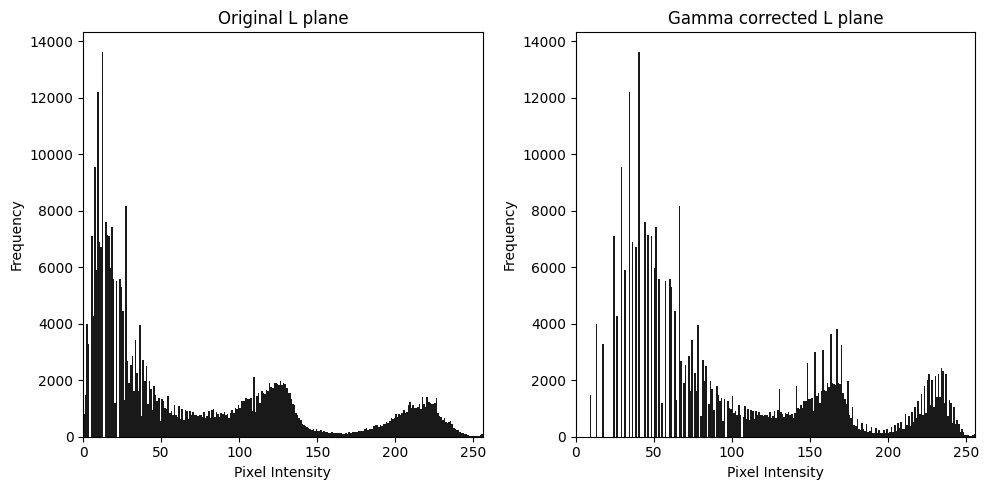

In [127]:
# Compute the histograms for both images
hist1 = cv.calcHist([L], [0], None, [256], [0, 256])
hist2 = cv.calcHist([L_modified], [0], None, [256], [0, 256])

L_flat = L.flatten()
L_modified_flat = L_modified.flatten()

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# First subplot: Histogram of the first image
plt.subplot(1, 2, 1)
plt.hist(L_flat, bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Original L plane')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second subplot: Histogram of the second image
plt.subplot(1, 2, 2)
plt.hist(L_modified_flat, bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Gamma corrected L plane')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display the plots side by side
plt.tight_layout()  # Adjusts the spacing between subplots for a neat layout
plt.show()

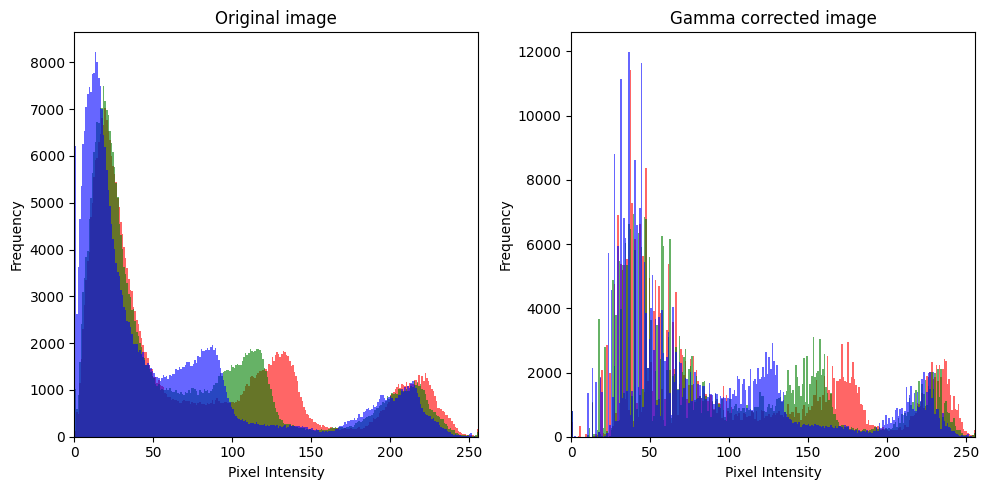

In [128]:
# Color channels
colors = ('r', 'g', 'b')  # Color channels
plt.figure(figsize=(10, 5))

# First image's histograms
plt.subplot(1, 2, 1)
for i, col in enumerate(colors):
    # Flatten the channel
    channel_flat = img_rgb[:, :, i].flatten()  # Extract and flatten the red, green, or blue channel
    plt.hist(channel_flat, bins=256, range=(0, 256), color=col, alpha=0.6)  # Use plt.hist
plt.title('Original image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second image's histograms
plt.subplot(1, 2, 2)
for i, col in enumerate(colors):
    # Flatten the channel
    channel_flat = img_modified[:, :, i].flatten()  # Extract and flatten the channel
    plt.hist(channel_flat, bins=256, range=(0, 256), color=col, alpha=0.6)  # Use plt.hist
plt.title('Gamma corrected image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display the plots side by side
plt.tight_layout()  # Adjusts the spacing between subplots for a neat layout
plt.show()

### Question 4

In [129]:
spider = cv.imread('a1images/spider.png')

spider_hsv  = cv.cvtColor(spider, cv.COLOR_BGR2HSV)
spider_rgb  = cv.cvtColor(spider, cv.COLOR_BGR2RGB)

H, S, V = cv.split(spider_hsv)

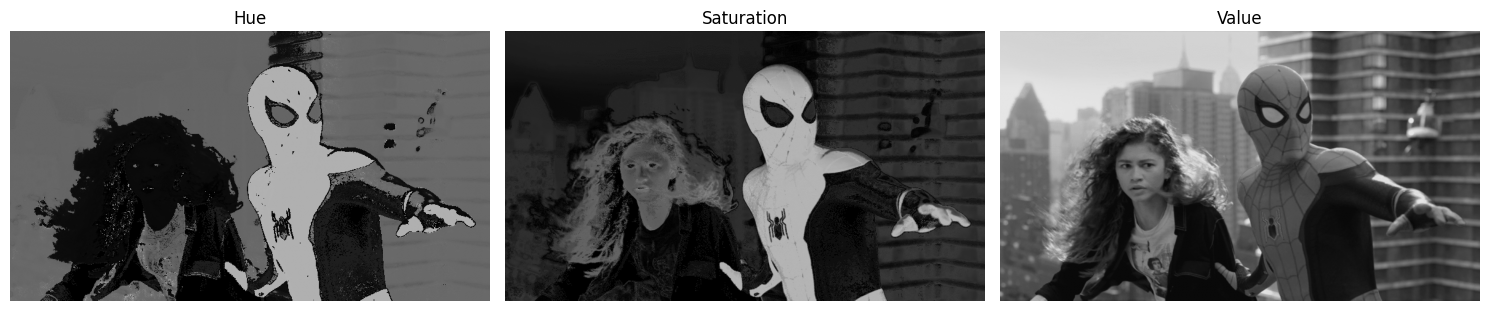

In [130]:
fig, ax = plt.subplots( 1, 3, figsize = (15,5))

ax[0].imshow(H, cmap='gray', vmin=0,vmax =255)
ax[0].set_title('Hue')
ax[0].axis('off')


ax[1].imshow(S, cmap='gray', vmin=0,vmax =255)
ax[1].set_title('Saturation')
ax[1].axis('off')


ax[2].imshow(V, cmap='gray', vmin=0,vmax =255)
ax[2].set_title('Value')
ax[2].axis('off')

plt.tight_layout()
plt.show()

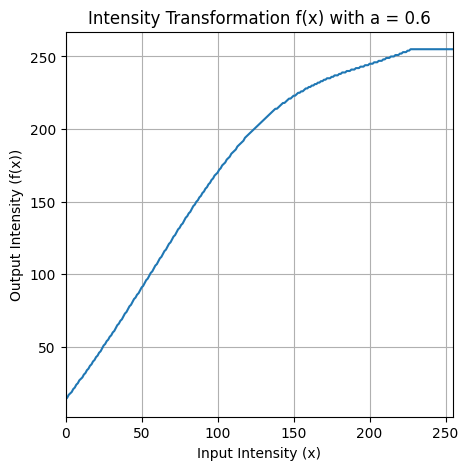

In [138]:
# Define the transformation function

a= 0.6
sigma = 70.0
x = np.arange(0,256)
f = np.minimum(x + a * 128 * np.exp(-((x-128)**2) / (2 * sigma ** 2)),255).astype('uint8')

# Display the image
plt.figure(figsize=(5, 5))
plt.plot(x, f)
plt.title(f'Intensity Transformation f(x) with a = {a}')
plt.xlabel('Input Intensity (x)')
plt.ylabel('Output Intensity (f(x))')
plt.grid(True)
plt.xlim([0, 255])
plt.xlim([0, 255])
plt.show()


In [139]:
# S_modified = cv.LUT(S , f)

# spider_modified = cv.merge(H,S_modified,V)
# spider_modified = cv.cvtColor(spider_modified, cv.COLOR_HSV2RGB)

# Apply transformation to Saturation plane
S_modified = cv.LUT(S, f)

# Merge
merged = cv.merge([H, S_modified, V])
spider_modified = cv.cvtColor(merged, cv.COLOR_HSV2RGB)

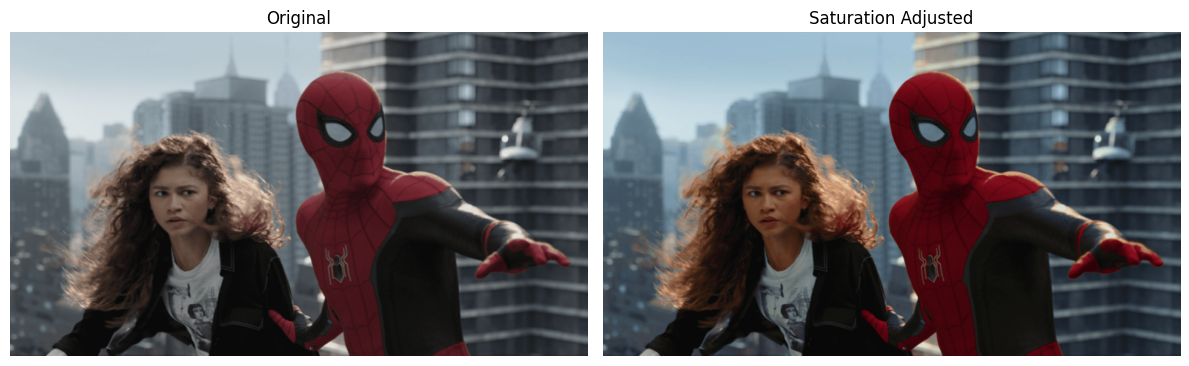

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(spider_rgb)
ax[0].set_title('Original')
ax[0].axis("off")
ax[1].imshow(spider_modified)
ax[1].set_title('Saturation Adjusted')
ax[1].axis("off")


plt.tight_layout()
plt.show()

### Question 5 

In [141]:
# Import Shells image
shells = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
assert shells is not None

In [142]:
def histogram_equalization(f):
    # Get image details
    L = 256
    M, N = f.shape

    # Get histogram
    hist = cv.calcHist([f], [0], None, [L], [0, L])
    cdf = hist.cumsum()

    # Define transformation
    t = np.array([(L-1)/(M*N)*cdf[k] for k in range(256)]).astype("uint8")

    return t[f]

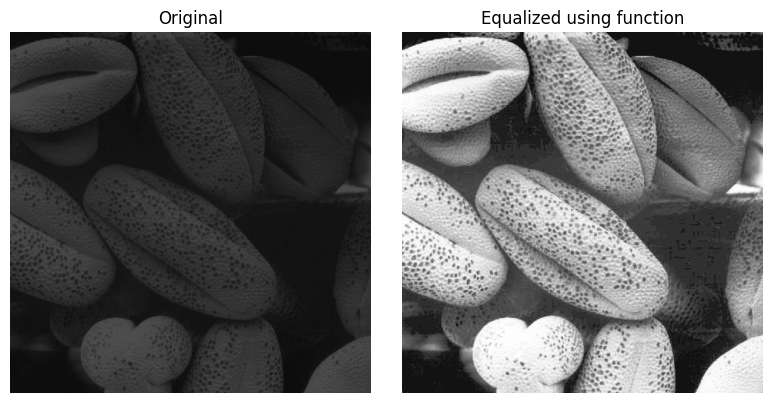

In [143]:
# Do histrogram equalization
equalized = histogram_equalization(shells)

# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(shells, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis("off")
ax[1].imshow(equalized, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Equalized using function')
ax[1].axis("off")

# Show the plot
plt.tight_layout()
plt.show()

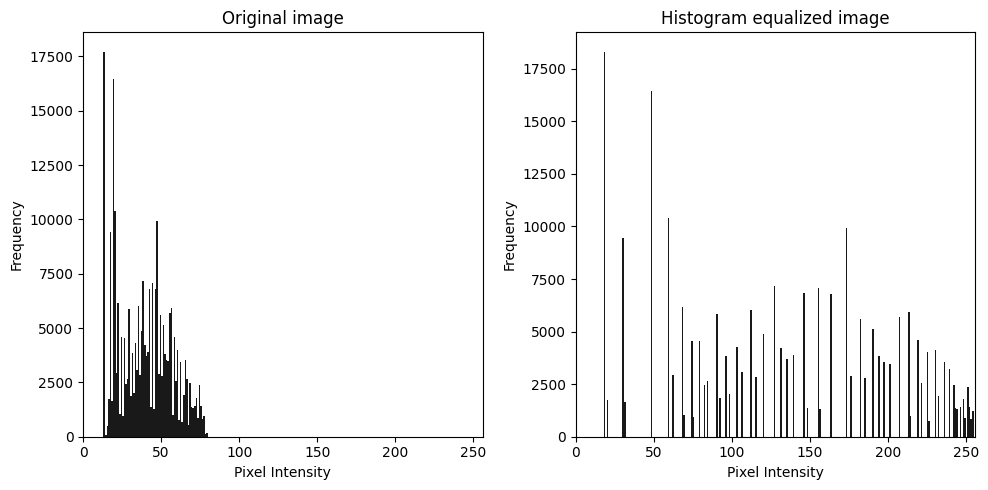

In [144]:
# Compute the histograms for both images
hist1 = cv.calcHist([shells], [0], None, [256], [0, 256])
hist2 = cv.calcHist([equalized], [0], None, [256], [0, 256])

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

shells_flat = shells.flatten()
equalized_flat = equalized.flatten()

# First subplot: Histogram of the first image
plt.subplot(1, 2, 1)
plt.hist(shells_flat, bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Original image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second subplot: Histogram of the second image
plt.subplot(1, 2, 2)
plt.hist(equalized_flat, bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Histogram equalized image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display the plots side by side
plt.tight_layout()  # Adjusts the spacing between subplots for a neat layout
plt.show()